# New Section

In [ ]:
! pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import category_encoders as cs

In [67]:
df=pd.read_csv('spaceship-Titanic.csv')

In [40]:
print(df.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [68]:
#set columns to be ['PassengerId', 'Name', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet', 'Transported']
#swap 'Name' , 'HomePlanet'
df[['Name','HomePlanet']]=df[['HomePlanet','Name']]
df=df.rename(columns = {'HomePlanet':'Name','Name':'HomePlanet'})
print(df.head())

  PassengerId               Name CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01    Maham Ofracculy     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01       Juanna Vines     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01      Altark Susent     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02       Solam Susent     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01  Willy Santantines     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck HomePlanet  \
0          0.0        0.0           0.0     0.0     0.0     Europa   
1        109.0        9.0          25.0   549.0    44.0      Earth   
2         43.0     3576.0           0.0  6715.0    49.0     Europa   
3          0.0     1283.0         371.0  3329.0   193.0     Europa   
4        303.0       70.0         151.0   565.0     2.0      Earth   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [69]:
#set columns to be ['PassengerId', 'Name', 'HomePlanet', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'Transported']
#swap 'CryoSleep' , 'HomePlanet'
df[['CryoSleep','HomePlanet']]=df[['HomePlanet','CryoSleep']]
df=df.rename(columns = {'HomePlanet':'CryoSleep','CryoSleep':'HomePlanet'})
print(df.head())

  PassengerId               Name HomePlanet  Cabin  Destination   Age    VIP  \
0     0001_01    Maham Ofracculy     Europa  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01       Juanna Vines      Earth  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01      Altark Susent     Europa  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02       Solam Susent     Europa  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01  Willy Santantines      Earth  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck CryoSleep  Transported  
0          0.0        0.0           0.0     0.0     0.0     False        False  
1        109.0        9.0          25.0   549.0    44.0     False         True  
2         43.0     3576.0           0.0  6715.0    49.0     False        False  
3          0.0     1283.0         371.0  3329.0   193.0     False        False  
4        303.0       70.0         151.0   565.0     2.0     False         True  


In [8]:
print(df.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   Name          8493 non-null   object 
 2   HomePlanet    8492 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  CryoSleep     8476 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [10]:
#number of null values
print(df.isnull().sum())

PassengerId       0
Name            200
HomePlanet      201
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
CryoSleep       217
Transported       0
dtype: int64


In [70]:
#percentage of number of null values
new_df=pd.DataFrame(df.isnull().sum(),columns={'sum of null'})
new_df['percentage']=np.array(df.isnull().mean()*100)
print(new_df)
#we have no large missing data so we dont delete columns

              sum of null  percentage
PassengerId             0    0.000000
Name                  200    2.300702
HomePlanet            201    2.312205
Cabin                 199    2.289198
Destination           182    2.093639
Age                   179    2.059128
VIP                   203    2.335212
RoomService           181    2.082135
FoodCourt             183    2.105142
ShoppingMall          208    2.392730
Spa                   183    2.105142
VRDeck                188    2.162660
CryoSleep             217    2.496261
Transported             0    0.000000


In [71]:
#handel missing mata (mean,mode)
#Age -->mean
df['Age'].fillna(df['Age'].mean(),inplace=True)
#CryoSleep,HomePlanet -->mode
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0],inplace=True)
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace=True)
print(df.isnull().sum())

PassengerId       0
Name            200
HomePlanet        0
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
CryoSleep         0
Transported       0
dtype: int64


In [72]:
# find duplicated data to remove it
print(df.duplicated().any())
#we have not duplicated data
#to duplicate first row --> df=df.append(df.iloc[0])
#to remove duplicated --> df=df.drop_duplicates()

False


In [73]:
#convert datatype
df['Age']=df['Age'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   Name          8493 non-null   object 
 2   HomePlanet    8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   int64  
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  CryoSleep     8693 non-null   bool   
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(5), int64(1), object(6)
memory usage: 832.1+ KB
None


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


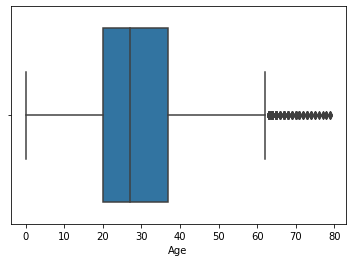

In [74]:
#detect outliers of Age
print(sns.boxplot(df['Age']))

In [75]:
#from boxplot we see there is not exist min_threshold
max_threshold=df['Age'].quantile(0.97)
print(max_threshold)

59.0


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


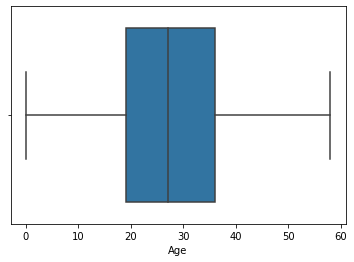

In [76]:
#remove outliers
new_df=df[df['Age']<max_threshold]
print(sns.boxplot(new_df['Age']))

In [77]:
#Normalization --> MinMaxScaler
df['RoomService']=MinMaxScaler().fit_transform(df['RoomService'].to_numpy().reshape(-1,1))
print(df['RoomService'].describe())

count    8512.000000
mean        0.015683
std         0.046536
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003281
max         1.000000
Name: RoomService, dtype: float64


In [78]:
#Standardization --> StandardScaler
df['Spa']=StandardScaler().fit_transform(df['Spa'].to_numpy().reshape(-1,1))
print(df['Spa'].describe())

count    8.510000e+03
mean     2.087376e-17
std      1.000059e+00
min     -2.737359e-01
25%     -2.737359e-01
50%     -2.737359e-01
75%     -2.218284e-01
max      1.944053e+01
Name: Spa, dtype: float64


In [79]:
#mapping
d=df['Cabin'].to_numpy()
side=[]
for a in d:
  if(str(a)!='nan'):
    side.append(str(a)[-1])
  else:side.append('nan')
map={'P':0,'S':1,'nan':np.nan}
df['Side']=side
df['Side']=df['Side'].map(map)

map={True:1,False:0}
df['Transported']=df['Transported'].map(map)
df['VIP']=df['VIP'].map(map)
print(df.head())

  PassengerId               Name HomePlanet  Cabin  Destination  Age  VIP  \
0     0001_01    Maham Ofracculy     Europa  B/0/P  TRAPPIST-1e   39  0.0   
1     0002_01       Juanna Vines      Earth  F/0/S  TRAPPIST-1e   24  0.0   
2     0003_01      Altark Susent     Europa  A/0/S  TRAPPIST-1e   58  1.0   
3     0003_02       Solam Susent     Europa  A/0/S  TRAPPIST-1e   33  0.0   
4     0004_01  Willy Santantines      Earth  F/1/S  TRAPPIST-1e   16  0.0   

   RoomService  FoodCourt  ShoppingMall       Spa  VRDeck  CryoSleep  \
0     0.000000        0.0           0.0 -0.273736     0.0      False   
1     0.007608        9.0          25.0  0.209267    44.0      False   
2     0.003001     3576.0           0.0  5.634034    49.0      False   
3     0.000000     1283.0         371.0  2.655075   193.0      False   
4     0.021149       70.0         151.0  0.223344     2.0      False   

   Transported  Side  
0            0   0.0  
1            1   1.0  
2            0   1.0  
3           

In [80]:
#elements have null value : 
#  1:Delete row
#  2:replace with most freq
#  2:using model to predict

#delete row
df.dropna(inplace=True)
print(df.describe())

               Age          VIP  RoomService     FoodCourt  ShoppingMall  \
count  7091.000000  7091.000000  7091.000000   7091.000000   7091.000000   
mean     28.868848     0.023974     0.015465    471.253279    174.302637   
std      14.367168     0.152979     0.044758   1649.762807    562.969914   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%      20.000000     0.000000     0.000000      0.000000      0.000000   
50%      27.000000     0.000000     0.000000      0.000000      0.000000   
75%      37.000000     0.000000     0.003281     79.000000     27.000000   
max      79.000000     1.000000     0.692399  29813.000000  12253.000000   

               Spa        VRDeck  Transported         Side  
count  7091.000000   7091.000000  7091.000000  7091.000000  
mean      0.001854    300.427161     0.502750     0.505994  
std       1.009141   1110.851929     0.500028     0.499999  
min      -0.273736      0.000000     0.000000     0.000000  
25%      -

In [81]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(df,df['Transported'])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5318, 15)
(1773, 15)
(5318,)
(1773,)


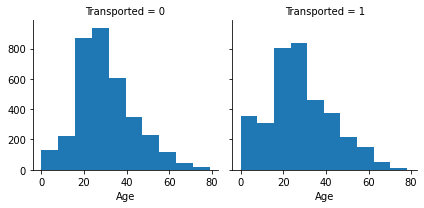

In [83]:
gr=sns.FacetGrid(df,col='Transported')
gr.map(plt.hist,'Age')

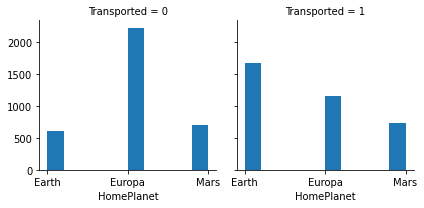

In [84]:
gr=sns.FacetGrid(df,col='Transported')
gr.map(plt.hist,'HomePlanet')

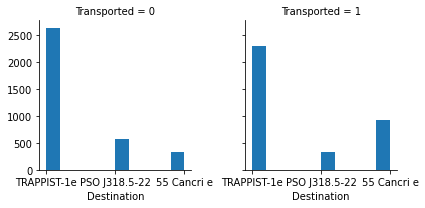

In [85]:
gr=sns.FacetGrid(df,col='Transported')
gr.map(plt.hist,'Destination')

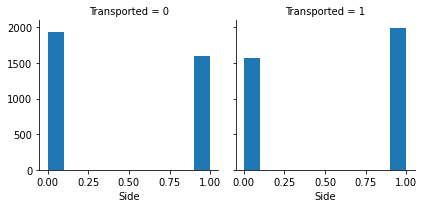

In [86]:
gr=sns.FacetGrid(df,col='Transported')
gr.map(plt.hist,'Side')

In [87]:
print(df.head())

  PassengerId               Name HomePlanet  Cabin  Destination  Age  VIP  \
0     0001_01    Maham Ofracculy     Europa  B/0/P  TRAPPIST-1e   39  0.0   
1     0002_01       Juanna Vines      Earth  F/0/S  TRAPPIST-1e   24  0.0   
2     0003_01      Altark Susent     Europa  A/0/S  TRAPPIST-1e   58  1.0   
3     0003_02       Solam Susent     Europa  A/0/S  TRAPPIST-1e   33  0.0   
4     0004_01  Willy Santantines      Earth  F/1/S  TRAPPIST-1e   16  0.0   

   RoomService  FoodCourt  ShoppingMall       Spa  VRDeck  CryoSleep  \
0     0.000000        0.0           0.0 -0.273736     0.0      False   
1     0.007608        9.0          25.0  0.209267    44.0      False   
2     0.003001     3576.0           0.0  5.634034    49.0      False   
3     0.000000     1283.0         371.0  2.655075   193.0      False   
4     0.021149       70.0         151.0  0.223344     2.0      False   

   Transported  Side  
0            0   0.0  
1            1   1.0  
2            0   1.0  
3           

In [88]:
#Linear Regression
from sklearn.linear_model import LinearRegression
#مقدرتش الاقي حاجة استخدمه فيها

In [ ]:
##use linear regression 
##find --> X , y 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) -->test size must be in (20% --> 40%)
# model = LinearRegression()
# model.fit(X_train, y_train)
# predicted = model.predict(X_test)
# score = model.score(X_test, y_test)
##  show plot
# plt.plot(X_train, y_train, 'o')
# plt.plot(X_test, predicted, color = 'r')
# plt.show()

In [90]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

   Age  VIP
0   39  0.0
1   24  0.0
2   58  1.0
3   33  0.0
4   16  0.0


In [96]:
##use Logistic Regression 
##find --> X , y
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) -->test size must be in (20% --> 40%)
# model = LogisticRegression()
# model.fit(X_train, y_train)
# predicted = model.predict(X_test)
# score = accuracy_score(predicted, y_test)
##  show plot
# plt.plot(X_train, y_train, 'o')
# plt.plot(X_test, predicted, color = 'r')
# plt.show()

In [ ]:
#note
معرفتش ازاي هستخدم ال regression وانا الداتا اللي عندي ال target بتاعها عبارة عن classification -->yes,no